## This references the feature column open source coursera course linked here, 

`git clone https://github.com/GoogleCloudPlatform/training-data-analyst`
    
training-data-analyst > courses > machine_learning > deepdive2 > introduction_to_tensorflow > labs and open feat.cols_tf.data.ipynb.

In [7]:
# You can use any Python source file as a module by executing an import statement in some other Python source file.
# The import statement combines two operations; it searches for the named module, then it binds the results of that search
# to a name in the local scope.
import numpy as np
import pandas as pd
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
# %matplotlib inline sets the backend of matplotlib to the `inline` backend
%matplotlib inline

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.5.0


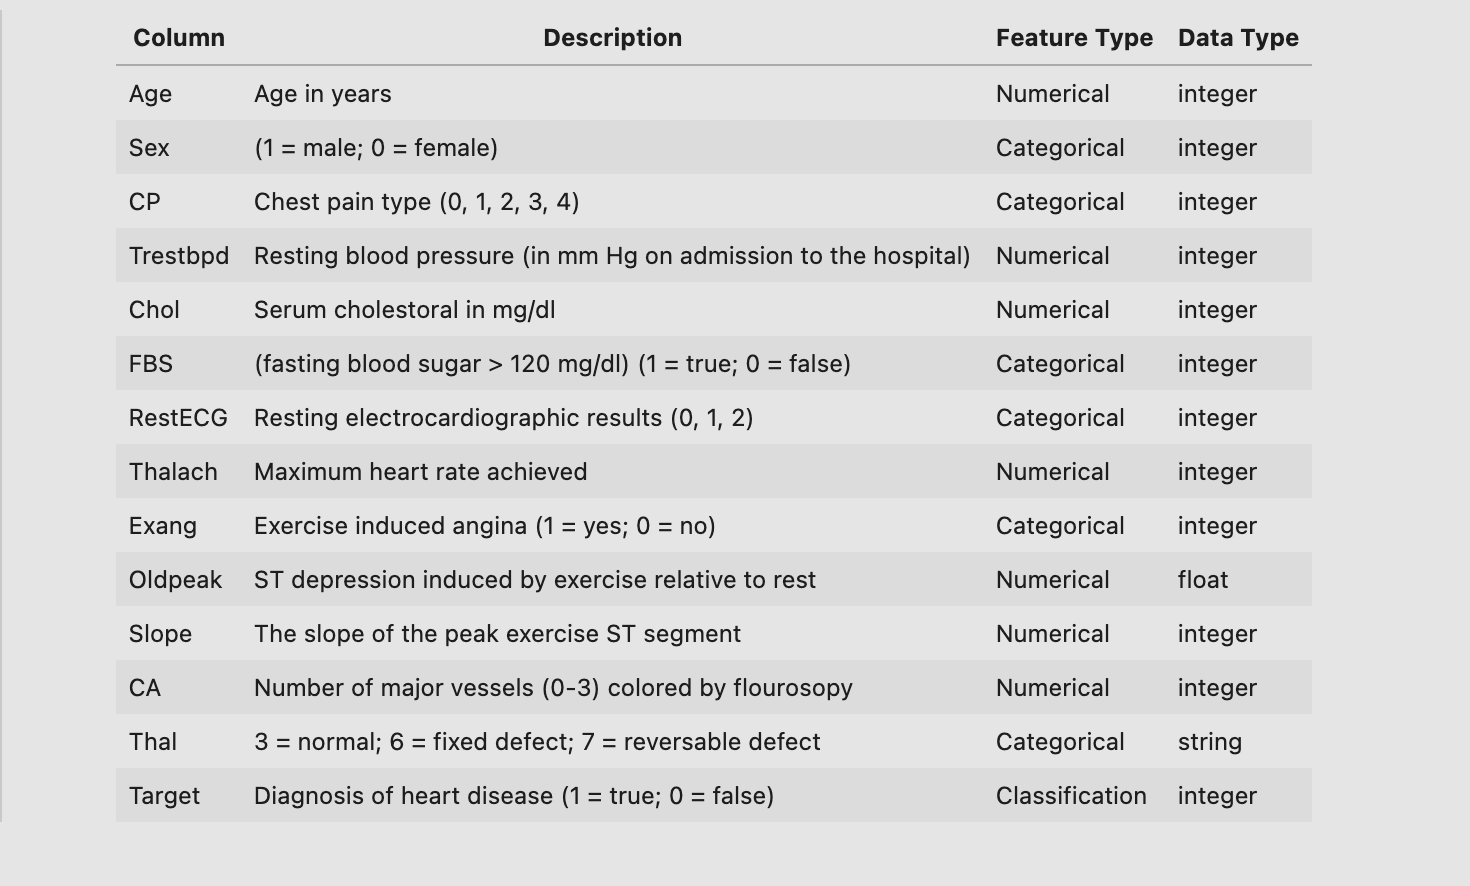
(link) https://archive.ics.uci.edu/ml/datasets/heart+Disease
We will use this information to predict whether a patient has heart disease, which in this dataset is a binary classification task.

In [19]:
URL = 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv'
# Read a comma-separated values (csv) file into a DataFrame using the read_csv() function
dataframe = pd.read_csv(URL)
# Get the first five rows using the head() method
display(dataframe.head())
display(dataframe.info())
display(dataframe.describe())
print("Rows: {} \nColumns: {}".format(dataframe.shape[0], dataframe.shape[1]))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


None

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Rows: 303 
Columns: 14


In [20]:
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

193 train examples
49 validation examples
61 test examples


In [27]:
def df_to_dataset(dataframe, shuffle=True, batch_size=16):
    dataframe = dataframe.copy() # copy because we dont wanna tapmer with origial data
    labels = dataframe.pop('target')
    # this has info on from_tensor_slices https://www.tensorflow.org/api_docs/python/tf/data/Dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(dataframe))
    dataset = dataset.batch(batch_size)
    return dataset

In [28]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [34]:
# look inside one batch
for feature_batch, label_batch in train_ds.take(1):
  print('All features:', list(feature_batch.keys()))
  print('A batch of ages:', feature_batch['age'])
  print('A batch of labels:', label_batch)

All features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch of ages: tf.Tensor([60 39 51 60 56], shape=(5,), dtype=int64)
A batch of labels: tf.Tensor([0 0 0 0 1], shape=(5,), dtype=int64)


In [35]:
example_batch = next(iter(train_ds))[0]
def demo(feature_column):
    # https://www.tensorflow.org/api_docs/python/tf/feature_column/numeric_column
    # and look at dense featurers function too for more info
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())

In [47]:
age = feature_column.numeric_column("age")
age

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [52]:
demo(age)
# example_batch

[[49.]
 [52.]
 [54.]
 [54.]
 [59.]]


{'age': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([49, 52, 54, 54, 59])>,
 'sex': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 1, 0, 1])>,
 'cp': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 4, 2, 3, 4])>,
 'trestbps': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([118, 125, 108, 108, 164])>,
 'chol': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([149, 212, 309, 267, 176])>,
 'fbs': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 1])>,
 'restecg': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 0, 0, 2, 2])>,
 'thalach': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([126, 168, 156, 167,  90])>,
 'exang': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0])>,
 'oldpeak': <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.8, 1. , 0. , 0. , 1. ])>,
 'slope': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 1, 1, 2])>,
 'ca': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 2, 0, 0, 2])>,
 'thal': <tf.Tensor: 

In [50]:
# spliting the age into sorts or "buckets"
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
demo(age_buckets)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [55]:
#. use vocab list to hot encode catogrical string data https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list
thal = tf.feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])

# Create an indicator column out of the created categorical column.
thal_one_hot = tf.feature_column.indicator_column(thal)
demo(thal_one_hot)
thal

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


VocabularyListCategoricalColumn(key='thal', vocabulary_list=('fixed', 'normal', 'reversible'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [54]:
# onehot encoding isn't effictive when we have a lot of category columns cuz it will not scale
# so we use embedding col https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column

thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
demo(thal_embedding)

[[ 0.12914003 -0.18273018  0.15657929  0.03694487 -0.29453105  0.17320853
  -0.23362799 -0.15720263]
 [ 0.43038094  0.68393695  0.51874584  0.362854   -0.4205023  -0.10960412
  -0.11852801 -0.1141847 ]
 [ 0.43038094  0.68393695  0.51874584  0.362854   -0.4205023  -0.10960412
  -0.11852801 -0.1141847 ]
 [ 0.12914003 -0.18273018  0.15657929  0.03694487 -0.29453105  0.17320853
  -0.23362799 -0.15720263]
 [ 0.23660225  0.14421737 -0.02220092 -0.08549574  0.42928112  0.4712257
   0.09540284  0.02451986]]


In [56]:
# you can also use a hased column

# Create a hashed feature column with `thal` as the key and 1000 hash buckets.
thal_hashed = tf.feature_column.categorical_column_with_hash_bucket(
      'thal', hash_bucket_size=1000)
demo(tf.feature_column.indicator_column(thal_hashed))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
'''
Crossed feature columns
Combining features into a single feature, better known as feature crosses, enables a model to learn separate weights for each combination of features. Here, we will create a new feature that is the cross of age and thal. Note that crossed_column does not build the full table of all possible combinations (which could be very large). Instead, it is backed by a hashed_column, so you can choose how large the table is.
https://developers.google.com/machine-learning/glossary/#feature_cross
'''

# Create a crossed column using the bucketized column (age_buckets)
# the categorical vocabulary column (thal), and 1000 hash buckets.
crossed_feature = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
demo(tf.feature_column.indicator_column(crossed_feature))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
feature_columns = []

# numeric cols
# Create a feature column out of the header using a numeric column.
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']:
  feature_columns.append(feature_column.numeric_column(header))

# bucketized cols
# Create a bucketized feature column out of the age column using the following boundaries.
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator cols
# Create a categorical vocabulary column out of the below categories with the key specified as `thal`.
thal = feature_column.categorical_column_with_vocabulary_list(
      'thal', ['fixed', 'normal', 'reversible'])
thal_one_hot = feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

# embedding cols
# Create an embedding column out of the categorical vocabulary
thal_embedding = feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed cols
# Create a crossed column using the bucketized column (age_buckets),
# the categorical vocabulary column (thal), and 1000 hash buckets.
crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
crossed_feature = feature_column.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [61]:

# Create a Keras DenseFeatures layer and pass the feature_columns
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [62]:
# `Sequential` provides training and inference features on this model.
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

# `Compile` configures the model for training.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# `Fit` trains the model for a fixed number of epochs
history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/7 [===>..........................] - ETA: 4s - loss: 3.0992 - accuracy: 0.3125WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'sex': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int64>, 'cp': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=int64>, 'trestbps': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int64>, 'chol': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'fbs': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'restecg': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'thalach': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=int64>, 'exang': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'oldpeak': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, '

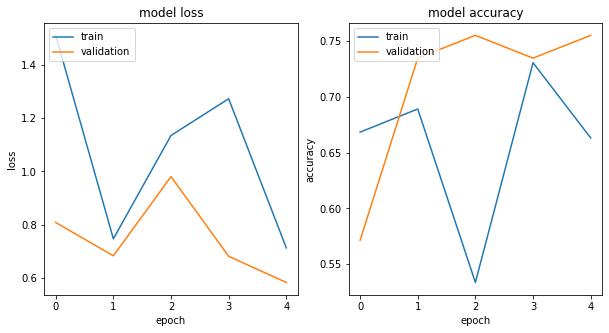

In [63]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');    
    
    

plot_curves(history, ['loss', 'accuracy'])

Key point: You will typically see best results with deep learning with much larger and more complex datasets. When working with a small dataset like this one, we recommend using a decision tree or random forest as a strong baseline. The goal of this tutorial is not to train an accurate model, but to demonstrate the mechanics of working with structured data, so you have code to use as a starting point when working with your own datasets in the future.